In [1]:
import os, copy
import glob

import numpy as np
import scipy.optimize as so
import pandas as pd
import xarray as xr
import rioxarray as rxr

import netCDF4
import h5py
from osgeo import gdal

%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt
import colorcet as cc

import prismapy.driver as driver
import prismapy

opj = os.path.join
prismapy.__version__

'1.0.1'

In [2]:
workdir = '/sat_data/satellite/acix-iii/Garda'
l1c = 'PRS_L1_STD_OFFL_20210721102700_20210721102705_0001.he5'
l2c = 'PRS_L2C_STD_20210721102700_20210721102705_0001.he5'

In [3]:
l1c_path = opj(workdir,l1c)
l2c_path = opj(workdir,l2c)

dc_l1c = driver.read_L1C_data(l1c_path,reflectance_unit=True)
dc_l2c = driver.read_L2C_data(l2c_path)


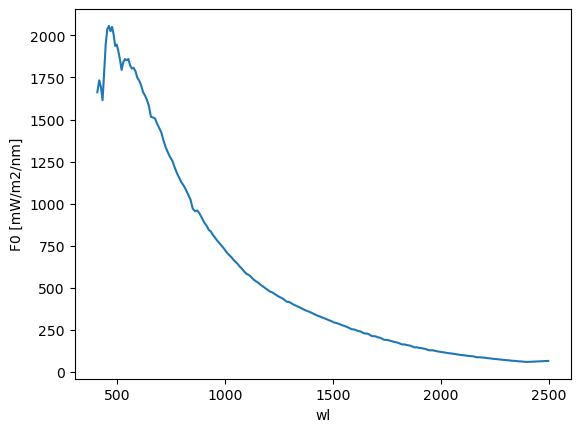

In [4]:
dc_l1c.F0.plot()

In [5]:
dc_l1c

<xarray.Dataset>
Dimensions:         (y: 1000, x: 1000, wl: 232)
Coordinates:
  * x               (x) int64 999 998 997 996 995 994 993 992 ... 6 5 4 3 2 1 0
  * y               (y) int64 999 998 997 996 995 994 993 992 ... 6 5 4 3 2 1 0
  * wl              (wl) float32 407.0 415.8 423.8 ... 2.49e+03 2.497e+03
Data variables:
    Ltoa            (y, x, wl) float32 3.22 3.28 3.27 3.28 ... 0.0 0.0 0.0 0.0
    F0              (wl) float64 1.662e+03 1.733e+03 1.692e+03 ... 66.09 66.51
    lon             (y, x) float32 10.85 10.85 10.85 10.85 ... 10.36 10.36 10.36
    lat             (y, x) float32 45.59 45.59 45.59 45.59 ... 45.41 45.41 45.41
    Rtoa            (y, x, wl) float64 0.006875 0.006716 0.006856 ... 0.0 0.0
    cloud_mask      (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    sunglint_mask   (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
    landcover_mask  (y, x) uint8 255 255 255 255 255 255 ... 255 255 255 255 255
Attributes:
    description:       PRISMA L1C cube data
    L1C_product_name:  PRS_L1_STD_OFFL_20210721102700_20210721102705_0001.he5
    acquisition_date:  2021-07-21T10:27:00.923000
    sza:               27.702345
    saa:               150.24118

## Plot the top-of-atmosphere (TOA) radiance in mW/m2/nm

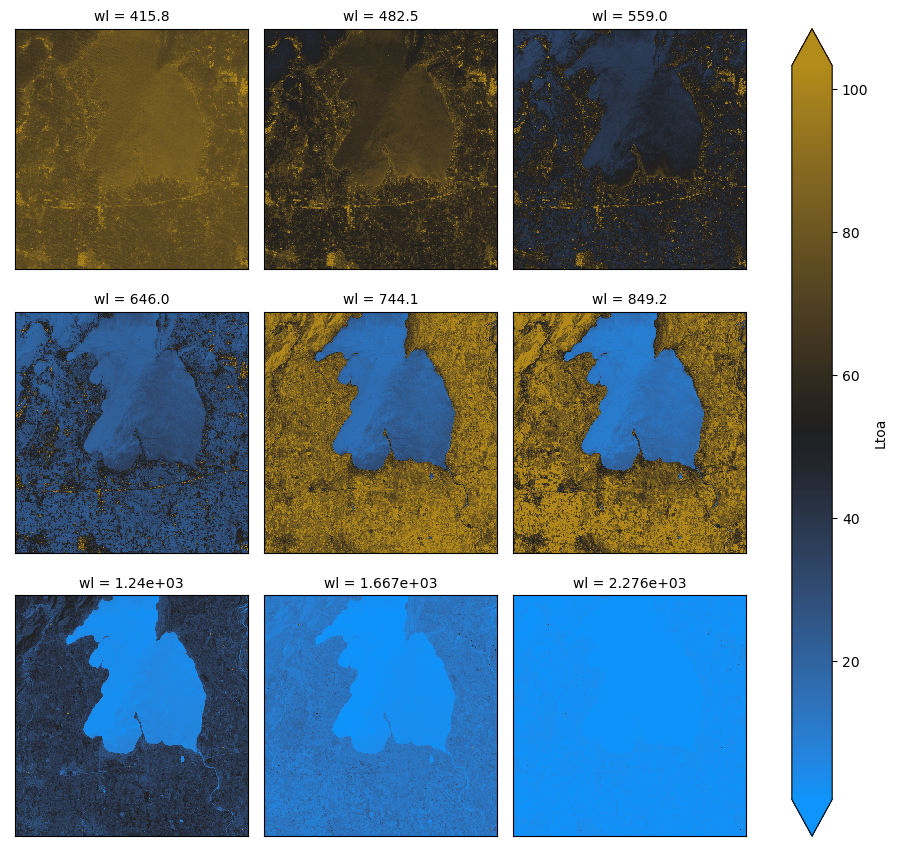

In [6]:
fig = dc_l1c.Ltoa.isel(wl=[1,10,20,30,40,50,90,130,200]).plot.imshow(col='wl',col_wrap=3,robust=True,cmap=cc.cm.bky)
for ax in fig.axs.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')
fig

## Plot the top-of-atmosphere (TOA) reflectance

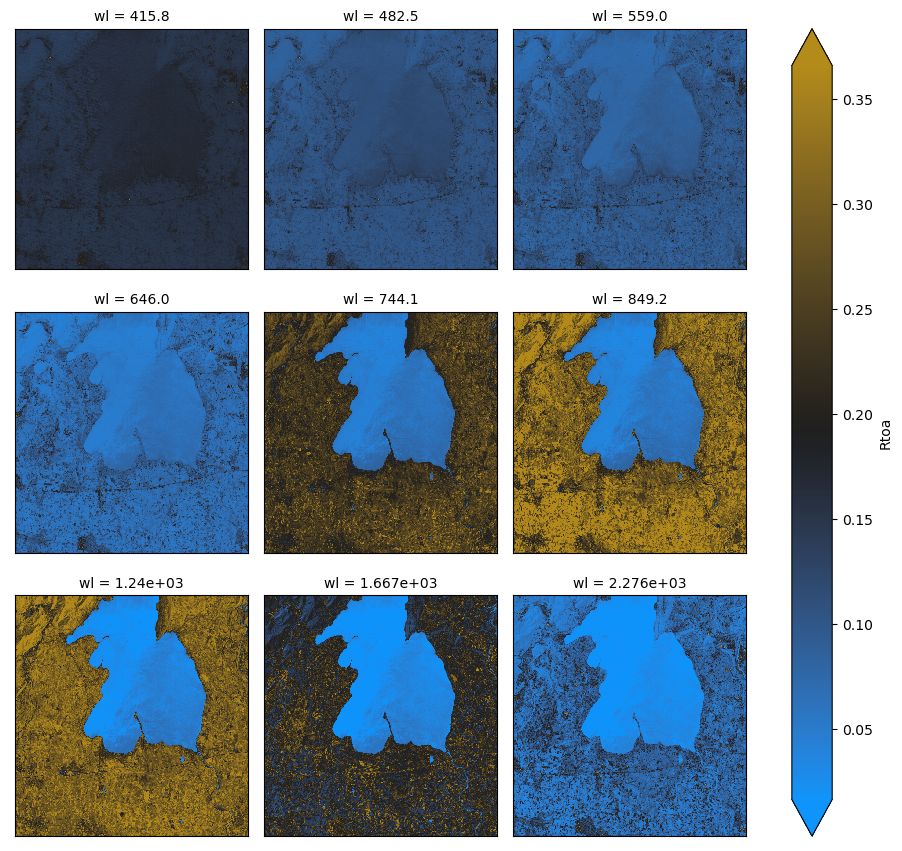

In [7]:
fig = dc_l1c.Rtoa.isel(wl=[1,10,20,30,40,50,90,130,200]).plot.imshow(col='wl',col_wrap=3,robust=True,cmap=cc.cm.bky)
for ax in fig.axs.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')
fig

## Plot the bottom-of-atmosphere (BOA) reflectance

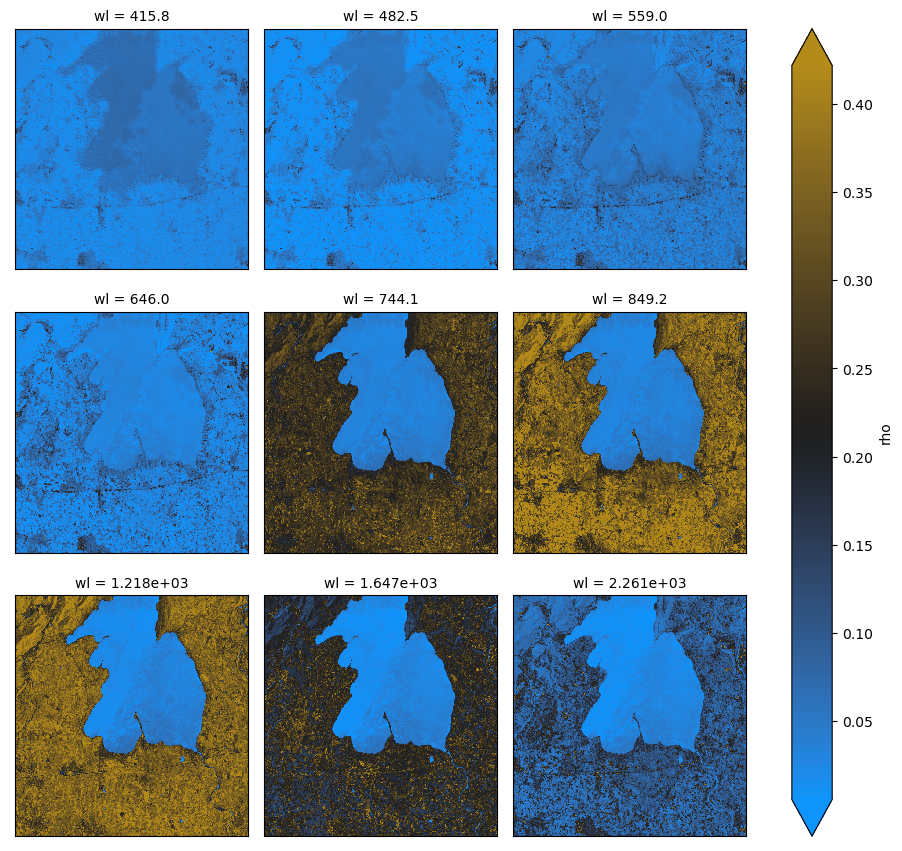

In [8]:
fig = dc_l2c.rho.isel(wl=[1,10,20,30,40,50,90,130,200]).plot.imshow(col='wl',col_wrap=3,robust=True,cmap=cc.cm.bky)
for ax in fig.axs.flat:
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel('')
    ax.set_xlabel('')
fig

## Check viewing geometry

In [9]:
dc_l2c

<xarray.Dataset>
Dimensions:  (y: 1000, x: 1000, wl: 234, y2: 50, x2: 50)
Coordinates:
  * x        (x) int64 999 998 997 996 995 994 993 992 991 ... 8 7 6 5 4 3 2 1 0
  * y        (y) int64 999 998 997 996 995 994 993 992 991 ... 8 7 6 5 4 3 2 1 0
  * wl       (wl) float32 407.0 415.8 423.8 ... 2.484e+03 2.49e+03 2.497e+03
Dimensions without coordinates: y2, x2
Data variables:
    rho      (y, x, wl) float32 0.0 0.0 0.0 0.0 0.0 ... 0.002792 0.0 0.0 0.0 0.0
    lon      (y, x) float64 10.85 10.85 10.85 10.85 ... 10.36 10.36 10.36 10.36
    lat      (y, x) float64 45.59 45.59 45.59 45.59 ... 45.41 45.41 45.41 45.41
    vza      (y, x) float32 15.66 15.66 15.66 15.65 ... 12.64 12.64 12.64 12.63
    raa      (y, x) float32 134.2 134.2 134.2 134.2 ... 134.9 134.9 134.9 134.9
    sza      (y, x) float32 27.62 27.62 27.62 27.62 ... 27.63 27.63 27.63 27.63
    aot      (y2, x2) float32 0.513 0.557 0.51 0.558 ... 0.612 0.591 0.607
    aex      (y2, x2) float32 3.134 3.143 3.095 3.115 ... 3.081 3.066 3.077
    wvm      (y, x) float32 0.03311 0.0 0.3529 0.03936 ... 2.601 2.641 2.595
    cot      (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    description:       RISMA L2C cube data
    L2C_product_name:  PRS_L2C_STD_20210721102700_20210721102705_0001.he5
    acquisition_date:  2021-07-21T10:27:00.923000

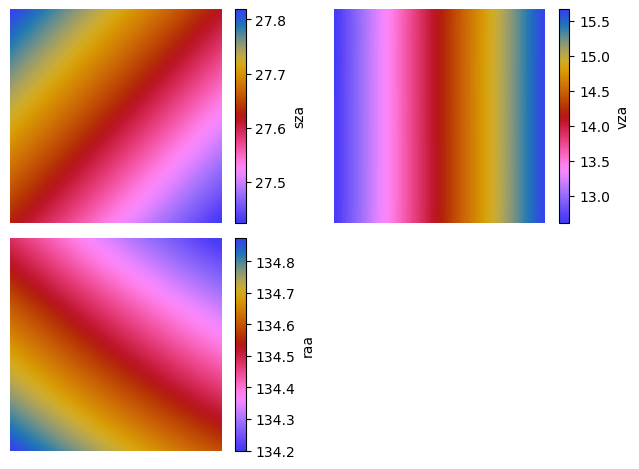

In [9]:
cmap = cc.cm.CET_C1s
fig, axs = plt.subplots(nrows=2,ncols=2)#,figsize=(20, 15))
axs=axs.ravel()
[axi.set_axis_off() for axi in axs]
#fig.subplots_adjust(bottom=0.05, top=1.1, left=0.15, right=1.05,hspace=0.2,wspace=0.025)
dc_l2c.sza.plot(ax=axs[0],cmap=cmap)
dc_l2c.vza.plot(ax=axs[1],cmap=cmap)
dc_l2c.raa.plot(ax=axs[2],cmap=cmap)

plt.tight_layout()

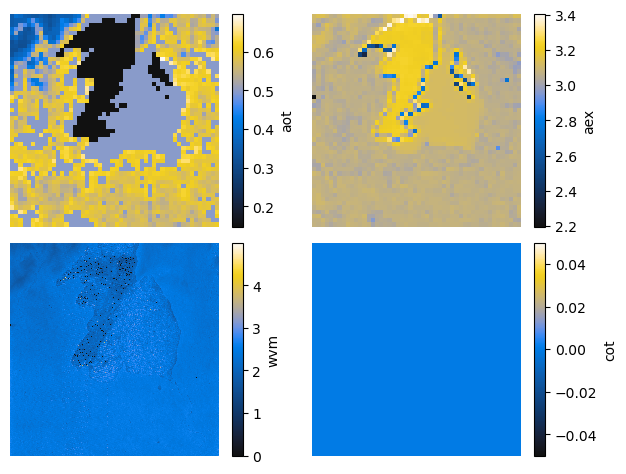

In [8]:
cmap = cc.cm.CET_CBL2
fig, axs = plt.subplots(nrows=2,ncols=2)#,figsize=(20, 15))
axs=axs.ravel()
[axi.set_axis_off() for axi in axs]
#fig.subplots_adjust(bottom=0.05, top=1.1, left=0.15, right=1.05,hspace=0.2,wspace=0.025)
dc_l2c.aot.plot(ax=axs[0],cmap=cmap)
dc_l2c.aex.plot(ax=axs[1],cmap=cmap)
dc_l2c.wvm.plot(ax=axs[2],cmap=cmap)
dc_l2c.cot.plot(ax=axs[3],cmap=cmap)

plt.tight_layout()

In [6]:
dc_l2c.x2

<xarray.DataArray 'x2' (x2: 50)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
Dimensions without coordinates: x2